In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('train.csv')

In [3]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.drop(['Name', 'PassengerId', 'Ticket', 'Embarked'], axis=1)
X_test = X_test.drop(['Name', 'PassengerId', 'Ticket', 'Embarked'], axis=1)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  712 non-null    int64  
 1   Sex     712 non-null    object 
 2   Age     572 non-null    float64
 3   SibSp   712 non-null    int64  
 4   Parch   712 non-null    int64  
 5   Fare    712 non-null    float64
 6   Cabin   159 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [5]:
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

X_train['Cabin'] = X_train['Cabin'].fillna('0')
X_test['Cabin'] = X_test['Cabin'].fillna('0')

X_train['Sp'] = X_train['SibSp'] + X_train['Parch']
X_train = X_train.drop('Sp', axis=1)
X_train['Sex']


331      male
733      male
382      male
704      male
813    female
        ...  
106    female
270      male
860      male
435    female
102      male
Name: Sex, Length: 712, dtype: object

In [6]:
objl = X_train.select_dtypes(include = 'object').columns

le = LabelEncoder()

X_train[objl] = X_train[objl].apply(le.fit_transform)
X_test[objl] = X_test[objl].apply(le.fit_transform)

<Axes: >

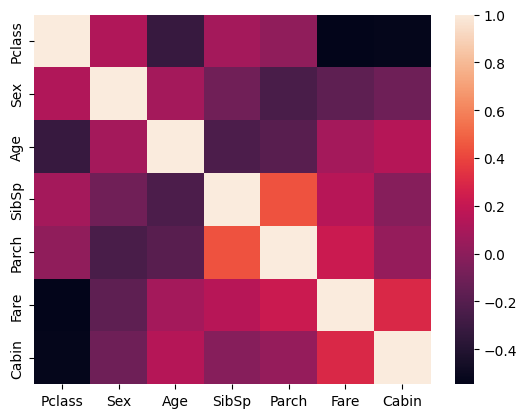

In [7]:
sns.heatmap(X_train.corr())

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(X_train)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)

In [10]:
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)

In [11]:
rf_acc = accuracy_score(y_test, rf_pred)
dt_acc = accuracy_score(y_test, dt_pred)

print(f'rf : {rf_acc} \n dt : {dt_acc}')

rf : 0.776536312849162 
 dt : 0.7318435754189944
